In [5]:
import numpy as np


def compute_mean(X):
    return np.mean(X)


X = [2, 0, 2, 2, 7, 4, -2, 5, -1, -1]
print("Mean : ", compute_mean(X))

Mean :  1.8


In [6]:
def compute_median(X):
    size = len(X)
    X = np.sort(X)
    if size % 2 == 0:
        return (X[int(size / 2)] + X[int(size / 2) - 1]) / 2
    else:

        return X[int(size // 2)]


X = [1, 5, 4, 4, 9, 13]
Y = [1, 5, 4, 4, 9, 13, 8]

print("Median : ", compute_median(X))
print("Median : ", compute_median(Y))

Median :  4.5
Median :  5


In [7]:
def compute_std(X):
    mean = compute_mean(X)
    variance = 0
    for x in X:
        variance += (x - mean) ** 2
    variance = variance / len(X)

    return np.sqrt(variance)


X = [171, 176, 155, 167, 169, 182]
print(compute_std(X))

8.32666399786453


In [ ]:
def compute_correlation_cofficient(X, Y):
    N = len(X)

    # Calculate sums required for the raw score formula
    sum_XY = np.sum(X * Y)
    sum_X = np.sum(X)
    sum_Y = np.sum(Y)
    sum_X_squared = np.sum(X**2)
    sum_Y_squared = np.sum(Y**2)

    # Calculate the numerator
    numerator = (N * sum_XY) - (sum_X * sum_Y)

    # Calculate the components for the denominator
    part1_denominator = (N * sum_X_squared) - (sum_X**2)
    part2_denominator = (N * sum_Y_squared) - (sum_Y**2)

    # Calculate the denominator
    denominator = np.sqrt(part1_denominator * part2_denominator)

    # Handle the case where the denominator is zero (e.g., no variance in X or Y)
    if denominator == 0:
        return 0.0  # Or np.nan, depending on desired behavior

    return np.round(numerator / denominator, 2)


X = np.asarray([-2, -5, -11, 6, 4, 15, 9])
Y = np.asarray([4, 25, 121, 36, 16, 225, 81])

print("Correlation: ", compute_correlation_cofficient(X, Y))

Correlation:  0.42


In [ ]:
import pandas as pd

data = pd.read_csv("./data/advertising.csv")


def correlation(x, y):
    return np.corrcoef(x, y)


features = ["TV", "Radio", "Newspaper"]
for feature_1 in features:
    for feature_2 in features:
        correlation_value = compute_correlation_cofficient(
            data[feature_1], data[feature_2]
        )
        print(
            f"Correlation Coeficient of {feature_1} and {feature_2}: {np.round(correlation_value, 2)}"
        )

Correlation Coeficient of TV and TV: 1.0
Correlation Coeficient of TV and Radio: 0.05
Correlation Coeficient of TV and Newspaper: 0.06
Correlation Coeficient of Radio and TV: 0.05
Correlation Coeficient of Radio and Radio: 1.0
Correlation Coeficient of Radio and Newspaper: 0.35
Correlation Coeficient of Newspaper and TV: 0.06
Correlation Coeficient of Newspaper and Radio: 0.35
Correlation Coeficient of Newspaper and Newspaper: 1.0


In [ ]:
x = data["TV"]
y = data["Newspaper"]
result = np.corrcoef(x, y)
data_corr = data.corr()
print(data.corr())

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


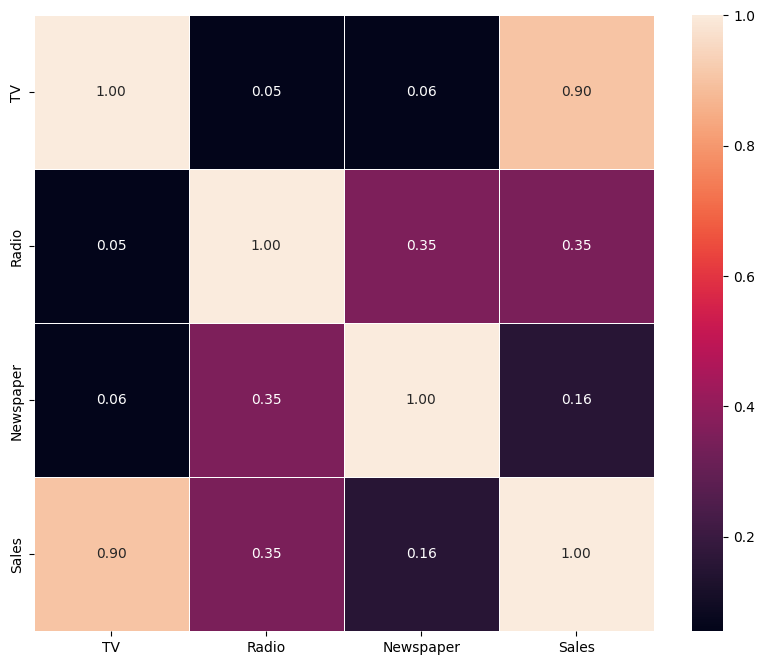

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(data_corr, annot=True, fmt=".2f", linewidth=0.5)
plt.show()